In [1]:
%load_ext autoreload

# **ESCUELA POLITECNICA NACIONAL**
- Nombre: Freddy Jimenez
- Curso: Gr1cc
- Fecha: 25/01/2025

## **REPOSITORIO. -**
- Link: https://github.com/freddy1604/RepositorioDeMetodosNumericos/tree/main/ZZZZZZZ

## **ACTIVIDAD EN CLASE. -**

### **INDICACIONES. -**
**RESOLVER SISTEMA**
- Usando funciones provistas
- Gauss Jacobi, Gauss Seidel

In [2]:
%autoreload 2
from src import gauss_jacobi
import numpy as np
import logging

logging.basicConfig(
    level=logging.INFO, 
    format="[%(asctime)s][%(levelname)s] i= %(message)s",
    datefmt="%m-%d %H:%M:%S",  
)

A = np.array([[2, 10], [3, 2]], dtype=float)
b = np.array([[16], [11]], dtype=float)

x0 = np.array([[1], [1]], dtype=float)  
tol = 1e-6  
max_iter = 14  

x_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

[01-25 09:15:08][INFO] 2025-01-25 09:15:08.325362


[01-25 09:15:08][INFO] 2025-01-25 09:15:08.499607
[01-25 09:15:08][INFO] i= 0 x: [[1. 1.]]
[01-25 09:15:08][INFO] i= 1 x: [[3. 4.]]
[01-25 09:15:08][INFO] i= 2 x: [[-12.   1.]]
[01-25 09:15:08][INFO] i= 3 x: [[ 3.  23.5]]
[01-25 09:15:08][INFO] i= 4 x: [[-109.5    1. ]]
[01-25 09:15:08][INFO] i= 5 x: [[  3.   169.75]]
[01-25 09:15:08][INFO] i= 6 x: [[-840.75    1.  ]]
[01-25 09:15:08][INFO] i= 7 x: [[   3.    1266.625]]
[01-25 09:15:08][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-25 09:15:08][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]
[01-25 09:15:08][INFO] i= 10 x: [[-4.74579375e+04  1.00000000e+00]]
[01-25 09:15:08][INFO] i= 11 x: [[3.00000000e+00 7.11924062e+04]]
[01-25 09:15:08][INFO] i= 12 x: [[-3.55954031e+05  1.00000000e+00]]
[01-25 09:15:08][INFO] i= 13 x: [[3.00000000e+00 5.33936547e+05]]


In [3]:
%autoreload 2
from src import gauss_seidel  
import numpy as np
import logging

logging.basicConfig(
    level=logging.INFO, 
    format="[%(asctime)s][%(levelname)s] i= %(message)s",
    datefmt="%m-%d %H:%M:%S",  
)

A = np.array([[2, 10], [3, 2]], dtype=float)
b = np.array([[16], [11]], dtype=float)

x0 = np.array([[1], [1]], dtype=float)  
tol = 1e-6  
max_iter = 14  

# Resolver usando Gauss-Seidel
x_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

[01-25 09:15:08][INFO] i= 0 x: [[1. 1.]]
[01-25 09:15:08][INFO] i= 1 x: [[3. 1.]]


### **GRAFICAR TRAYECTORIA DIVERGENCIA. -**
- Obtener trayectoria de puntos
- Desde $x_0$ hasta sol

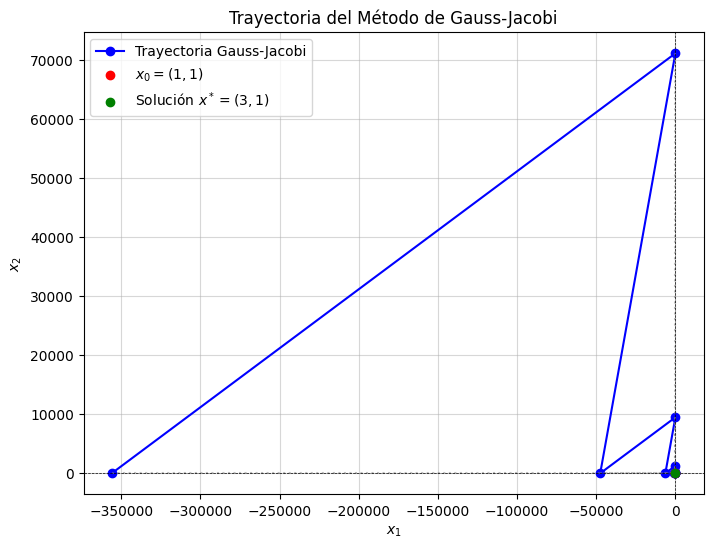

In [4]:
import matplotlib.pyplot as plt
import numpy as np

solution = np.array([3, 1])

tray_jacobi_points = np.array([t.flatten() for t in tray_jacobi[:13]])

plt.figure(figsize=(8, 6))

plt.plot(tray_jacobi_points[:, 0], tray_jacobi_points[:, 1], 'o-', label="Trayectoria Gauss-Jacobi", color="blue")

plt.scatter(tray_jacobi_points[0, 0], tray_jacobi_points[0, 1], color='red', label="$x_0 = (1, 1)$", zorder=5)
plt.scatter(solution[0], solution[1], color='green', label="Solución $x^* = (3, 1)$", zorder=5)

for point in tray_jacobi_points:
    plt.plot([point[0], solution[0]], [point[1], solution[1]], linestyle="dotted", color="gray", alpha=0.5)

plt.title("Trayectoria del Método de Gauss-Jacobi")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


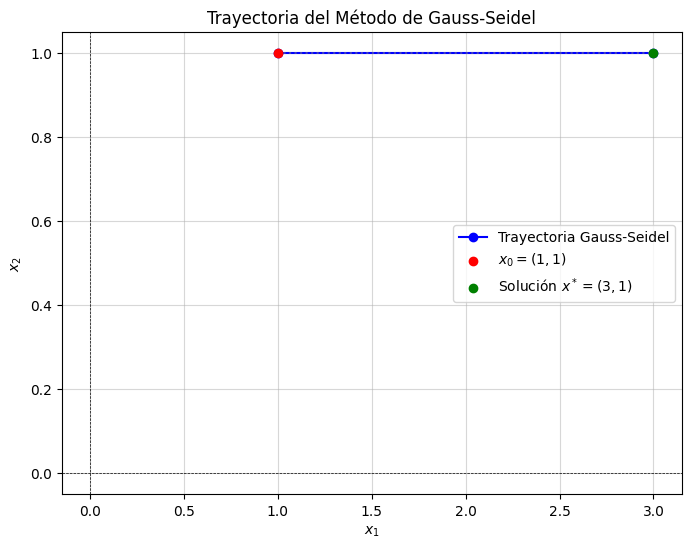

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Solución esperada
solution = np.array([3, 1])  

# Supongamos que `tray_seidel` contiene el historial de puntos en forma de listas o arreglos
tray_seidel_points = np.array([t.flatten() for t in tray_seidel])  # Convertir a un arreglo 2D

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar la trayectoria del método Gauss-Seidel
plt.plot(
    tray_seidel_points[:, 0], tray_seidel_points[:, 1], 
    'o-', label="Trayectoria Gauss-Seidel", color="blue"
)

# Puntos destacados: el inicial y la solución
plt.scatter(tray_seidel_points[0, 0], tray_seidel_points[0, 1], color='red', label="$x_0 = (1, 1)$", zorder=5)
plt.scatter(solution[0], solution[1], color='green', label="Solución $x^* = (3, 1)$", zorder=5)

# Líneas que conectan cada iteración con la solución
for point in tray_seidel_points:
    plt.plot([point[0], solution[0]], [point[1], solution[1]], linestyle="dotted", color="gray", alpha=0.5)

# Configuración de la gráfica
plt.title("Trayectoria del Método de Gauss-Seidel")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### **GRAFICAR TRAYECTORIA CONVERGENCIA. -**
- Intercambiar filas

In [6]:
%autoreload 2
from src import gauss_jacobi
import numpy as np
import logging

logging.basicConfig(
    level=logging.INFO, 
    format="[%(asctime)s][%(levelname)s] i= %(message)s",
    datefmt="%m-%d %H:%M:%S",  
)

A = np.array([[3, 2], [2, 10]], dtype=float)
b = np.array([[11], [16]], dtype=float)

x0 = np.array([[1], [1]], dtype=float)  
tol = 1e-6  
max_iter = 14  

x_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

[01-25 09:15:11][INFO] i= 0 x: [[1. 1.]]
[01-25 09:15:11][INFO] i= 1 x: [[3.  1.4]]
[01-25 09:15:11][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-25 09:15:11][INFO] i= 3 x: [[3.         1.05333333]]
[01-25 09:15:11][INFO] i= 4 x: [[2.96444444 1.        ]]
[01-25 09:15:11][INFO] i= 5 x: [[3.         1.00711111]]
[01-25 09:15:11][INFO] i= 6 x: [[2.99525926 1.        ]]
[01-25 09:15:11][INFO] i= 7 x: [[3.         1.00094815]]
[01-25 09:15:11][INFO] i= 8 x: [[2.9993679 1.       ]]
[01-25 09:15:11][INFO] i= 9 x: [[3.         1.00012642]]
[01-25 09:15:11][INFO] i= 10 x: [[2.99991572 1.        ]]
[01-25 09:15:11][INFO] i= 11 x: [[3.         1.00001686]]
[01-25 09:15:11][INFO] i= 12 x: [[2.99998876 1.        ]]
[01-25 09:15:11][INFO] i= 13 x: [[3.         1.00000225]]


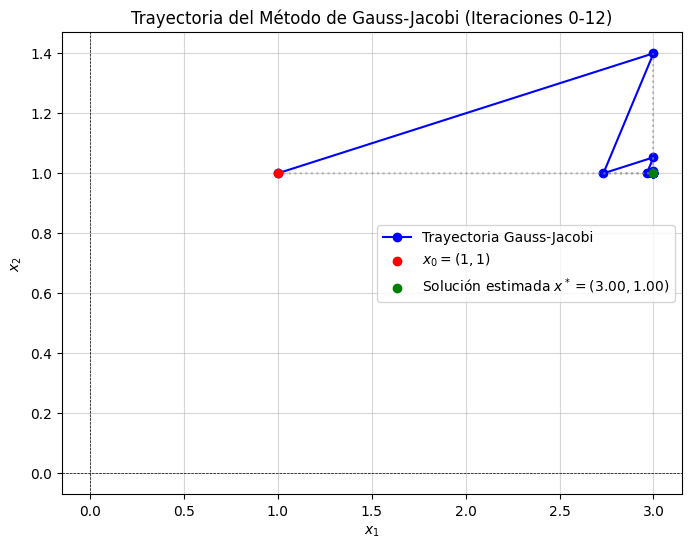

In [7]:
import matplotlib.pyplot as plt
import numpy as np

solution = np.array([x_jacobi[0, 0], x_jacobi[1, 0]])

tray_jacobi_points = np.array([t.flatten() for t in tray_jacobi[:13]])

plt.figure(figsize=(8, 6))

plt.plot(tray_jacobi_points[:, 0], tray_jacobi_points[:, 1], 'o-', label="Trayectoria Gauss-Jacobi", color="blue")

plt.scatter(tray_jacobi_points[0, 0], tray_jacobi_points[0, 1], color='red', label="$x_0 = (1, 1)$", zorder=5)
plt.scatter(solution[0], solution[1], color='green', label=f"Solución estimada $x^* = ({solution[0]:.2f}, {solution[1]:.2f})$", zorder=5)

for point in tray_jacobi_points:
    plt.plot([point[0], solution[0]], [point[1], solution[1]], linestyle="dotted", color="gray", alpha=0.5)

plt.title("Trayectoria del Método de Gauss-Jacobi (Iteraciones 0-12)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [8]:
%autoreload 2
from src import gauss_seidel 
import numpy as np
import logging

logging.basicConfig(
    level=logging.INFO, 
    format="[%(asctime)s][%(levelname)s] i= %(message)s",
    datefmt="%m-%d %H:%M:%S",  
)

A = np.array([[3, 2], [2, 10]], dtype=float)
b = np.array([[11], [16]], dtype=float)

x0 = np.array([[1], [1]], dtype=float)  
tol = 1e-6  
max_iter = 14  

x_jacobi, tray_jacobi = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

[01-25 09:15:13][INFO] i= 0 x: [[1. 1.]]


[01-25 09:15:13][INFO] i= 1 x: [[3. 1.]]


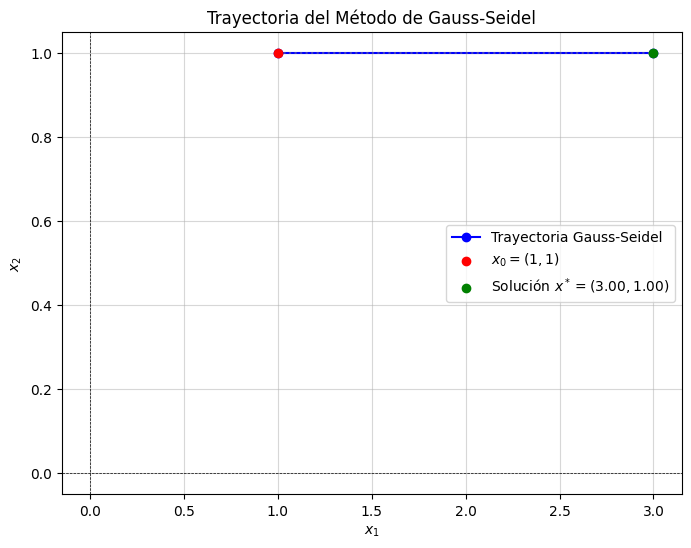

In [9]:
import matplotlib.pyplot as plt
import numpy as np

solution = np.linalg.solve(A, b).flatten()  

tray_jacobi_points = np.array([t.flatten() for t in tray_jacobi])

plt.figure(figsize=(8, 6))

plt.plot(
    tray_jacobi_points[:, 0], tray_jacobi_points[:, 1], 
    'o-', label="Trayectoria Gauss-Seidel", color="blue"
)

plt.scatter(tray_jacobi_points[0, 0], tray_jacobi_points[0, 1], color='red', label="$x_0 = (1, 1)$", zorder=5)
plt.scatter(solution[0], solution[1], color='green', label=f"Solución $x^* = ({solution[0]:.2f}, {solution[1]:.2f})$", zorder=5)

for point in tray_jacobi_points:
    plt.plot([point[0], solution[0]], [point[1], solution[1]], linestyle="dotted", color="gray", alpha=0.5)

plt.title("Trayectoria del Método de Gauss-Seidel")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(alpha=0.5)
plt.legend()
plt.show()